## Manter 10 ids que mais aparecem e o resto mudar para NaoAlimento

In [10]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Pytorch: 1.8.1+cu102
Fastai: 2.3.1


In [11]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from torchvision.utils import save_image
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import PIL 
import os

In [12]:
#pathToDataSet = "/mnt/c/Users/tomsq/Documents/UnB/2020.2/TG/dataset_v1/"
pathToDataSet = "../../DiabetesLearning/dataset_v1/sizeOriginal/"
#pathToDataSet = "../../dataset_v1/"
path_anno = pathToDataSet + 'gt/'
path_img = pathToDataSet + 'done/'
get_y_fn = lambda x : path_anno + f'{x.stem}_GT.png'


fnames = get_image_files(path_img)
print(len(fnames))

508


## Generate DataSet Histogram

In [13]:
totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[i]))
    arr = np.asarray(img)
    totalArray += list(np.unique(arr,return_counts=False))

print('Array Generated')


Array Generated


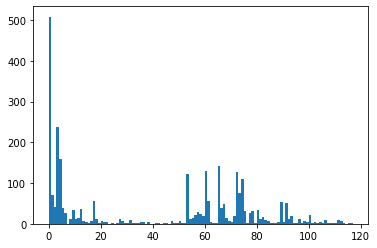

In [14]:
# histogram plot

codes = np.loadtxt( pathToDataSet + 'classesNumber.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] #pega apenas o ID de cada classe e ignora o nome

hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))
dicionario = {}


for code, contagem in zip(codes, hist[0]):
    dicionario[code] = int(contagem)

dicionario = {k: v for k, v in sorted(dicionario.items(), key=lambda item: item[1], reverse=True)} #sort



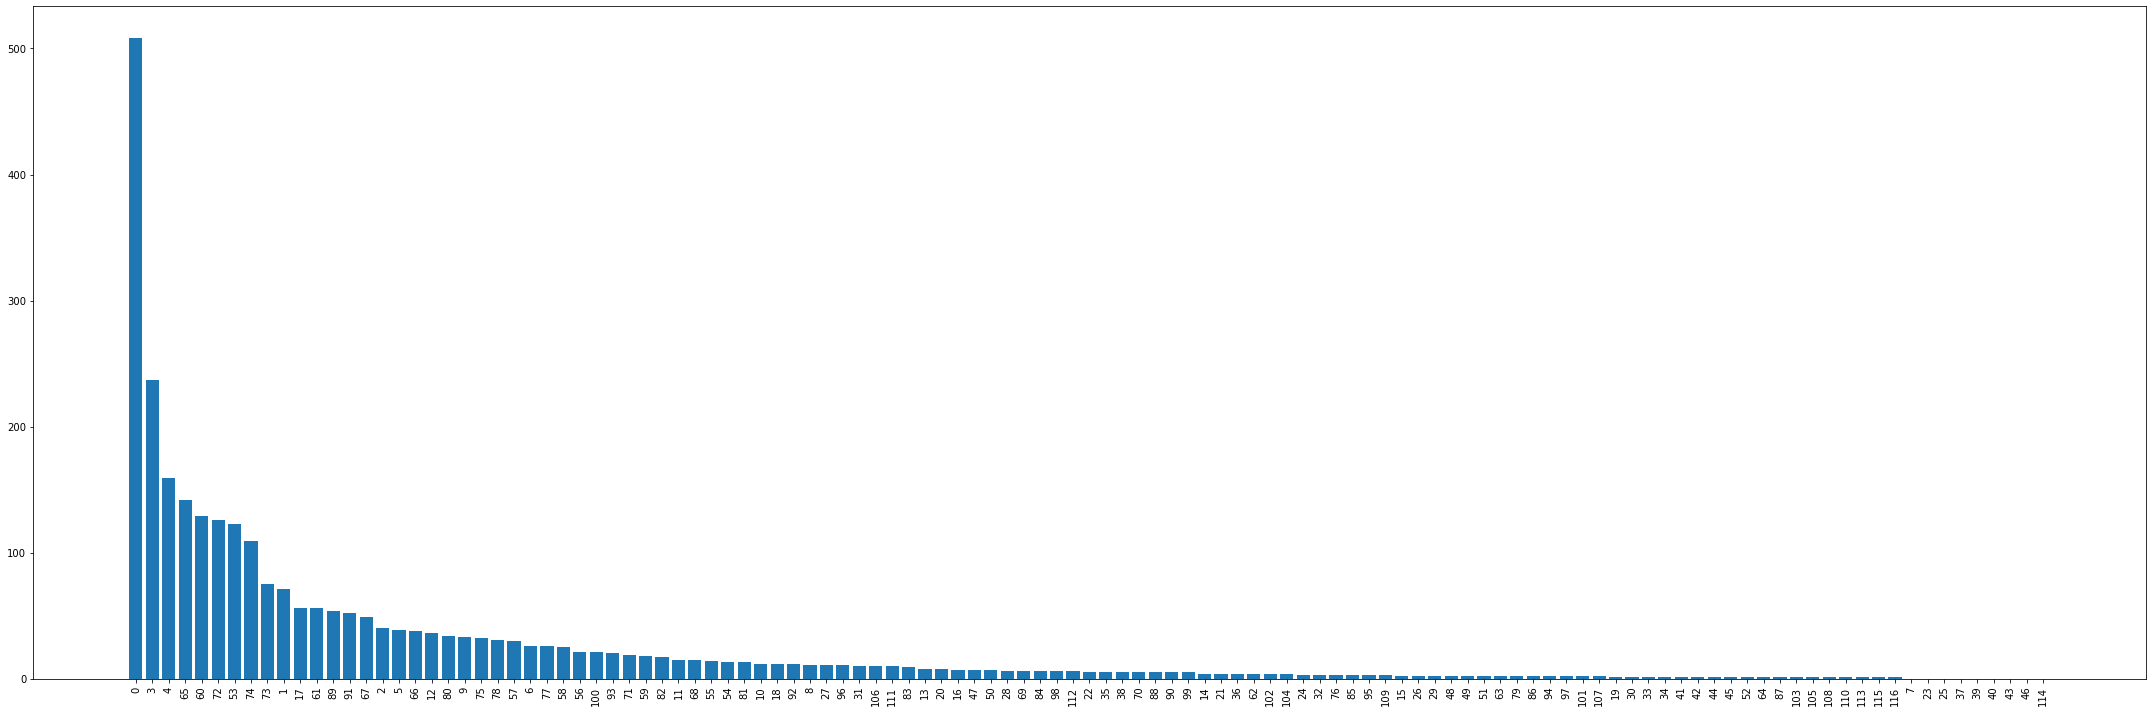

In [15]:
plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionario.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
print('Class that most appears >>> ', list(dicionario.items())[1][0])
print('Appears >>> ', list(dicionario.items())[1][1], ' times')

Class that most appears >>>  3
Appears >>>  237  times


## Select top K and change Ids

In [48]:
K = 31
topKDictionary = [int(list(dicionario)[i]) for i in range(0, K)]
classesToEliminate = [int(list(dicionario)[i]) for i in range(K, len(dicionario))]

In [49]:
# get all ground truth images and label ids of each sample

allGTs = []
idsInGTs = []
for idx in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[idx]))
    arr = np.asarray(img)
    idsInGTs.append(list(np.unique(arr,return_counts=False)))
    allGTs.append(arr)


In [50]:
def getImagesByClass(classId):
    imagesWithClass = []
    imagesIdx = []

    for i in range(0, len(fnames)):
        arr = allGTs[i]
        idsInGT = idsInGTs[i]
        if int(classId) in idsInGT:
            imagesWithClass.append(fnames[i])
            imagesIdx.append(i)
            

    return imagesWithClass, imagesIdx

In [51]:
def replaceIds(idsToReplace, newId, groundTruth):
    for id in idsToReplace:
        groundTruth = np.where(groundTruth==int(id), newId, groundTruth)
        
    return groundTruth


In [59]:
changeToNaoAlimento = [classesToEliminate, 0]
class1to0 = [[1], 0]

allSubstitutions = [changeToNaoAlimento, class1to0]


In [60]:
def groundTruthWithGroupedClassesGenerator(groundTruth, allSubstitutions):
    for substitution in allSubstitutions:
        groundTruth = replaceIds(substitution[0], substitution[1], groundTruth)
    return groundTruth


## Check new dataset histogram

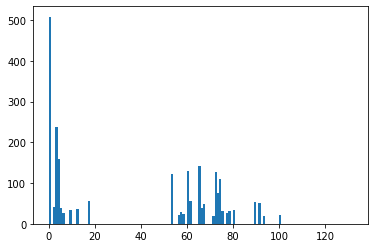

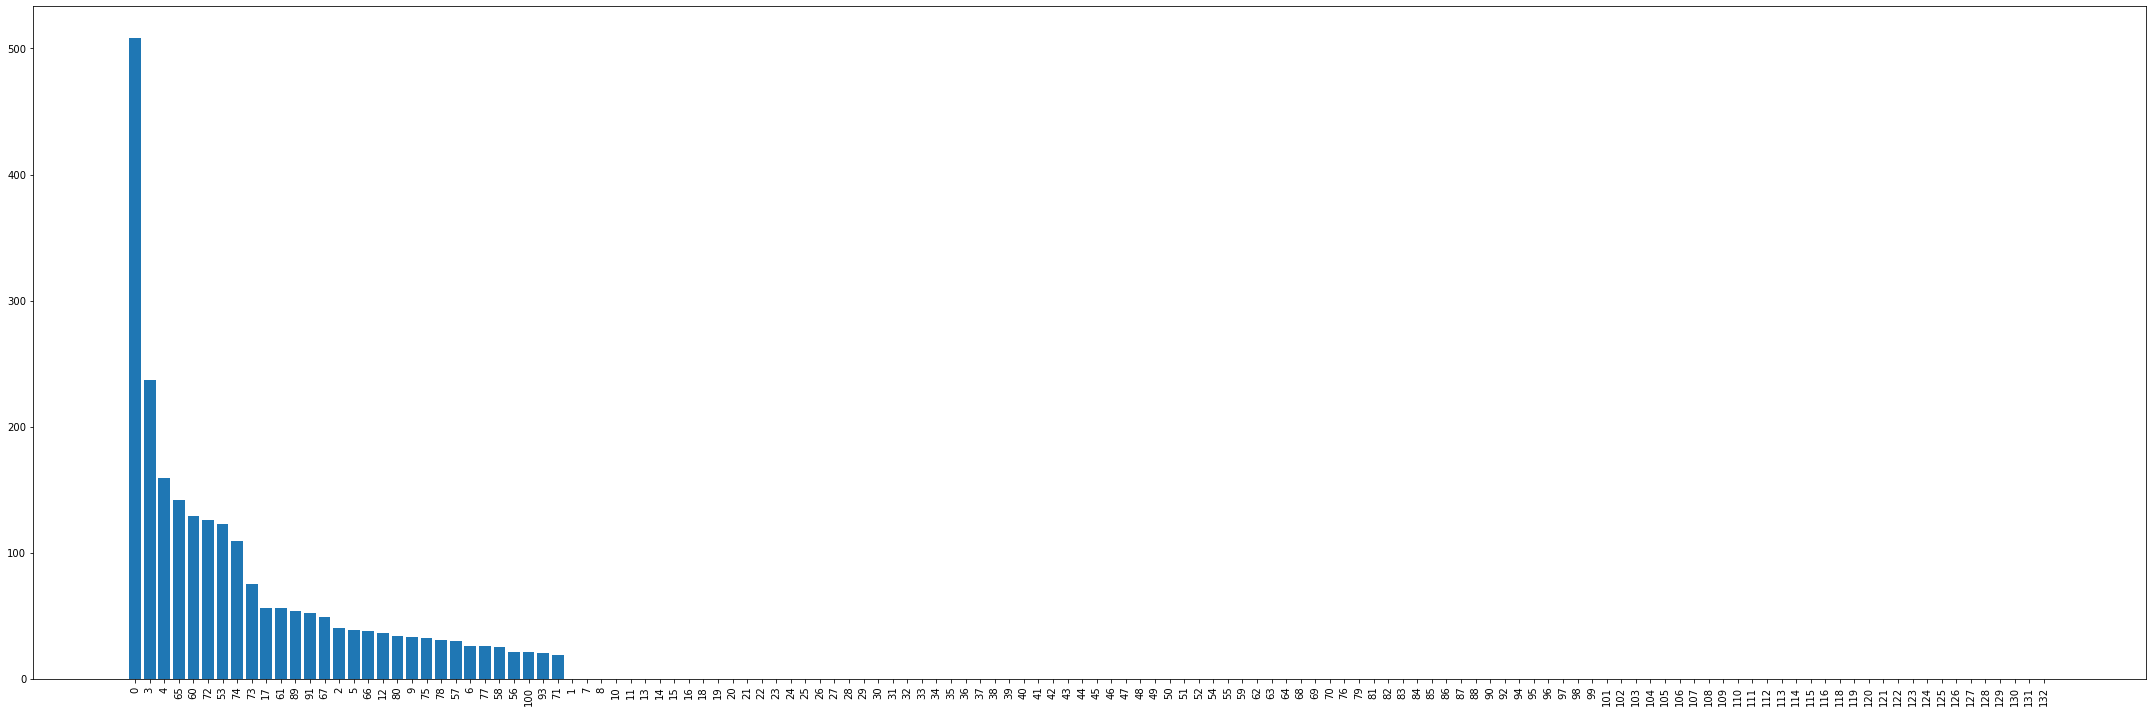

In [61]:
totalArray = []

for i in range(0,len(fnames)):
    img = Image.open(get_y_fn(fnames[i]))
    arr = np.asarray(img)
    arr = groundTruthWithGroupedClassesGenerator(arr, allSubstitutions) #array with altered classes ids
    totalArray += list(np.unique(arr,return_counts=False))

codes = np.loadtxt( 'classesNumberSprint3Complete.txt', dtype=str, delimiter='\n',encoding='utf') 
codes = [code.split(": ")[0] for code in codes] 

hist = plt.hist(totalArray, bins=len(codes), range=(0,len(codes)))
dicionarioDataset = {}


for code, contagem in zip(codes, hist[0]):
    dicionarioDataset[code] = int(contagem)

dicionarioDataset = {k: v for k, v in sorted(dicionarioDataset.items(), key=lambda item: item[1], reverse=True)} #sort

plt.figure(figsize=(30, 10))
plt.bar(*zip(*dicionarioDataset.items()))
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Export new dataset

In [62]:
pathToSprintFolder = pathToDataSet + 'sprint3/'
pathToSprintFolderDone = pathToSprintFolder + 'done/'
pathToSprintFolderGT = pathToSprintFolder + 'gt/'

In [63]:
# create folder for new data

try: 
    os.mkdir(pathToSprintFolder)
    print('Created Sprint Folder')
except OSError as error:
    print(error)

try: 
    os.mkdir(pathToSprintFolderDone)
    print('Created Sprint Folder Done')
except OSError as error:
    print(error)

try: 
    os.mkdir(pathToSprintFolderGT)
    print('Created Sprint Folder GT')
except OSError as error:
    print(error)

Created Sprint Folder
Created Sprint Folder Done
Created Sprint Folder GT


In [64]:
# copy new data and their gts to this sprint folder

from shutil import copyfile

for i in range(0, len(fnames)):
    copyfile(str(fnames[i]), pathToSprintFolderDone + fnames[i].name)
    copyfile(get_y_fn(fnames[i]), pathToSprintFolderGT + fnames[i].stem + "_GT.png")
    

In [65]:
fnamesSprint3 = get_image_files(pathToSprintFolderDone)
print(len(fnamesSprint3))

508


In [66]:
get_y_fn_sprint3 = lambda x : pathToSprintFolderGT + f'{x.stem}_GT.png'

for i in range(0,len(fnamesSprint3)):
    img = Image.open(get_y_fn_sprint3(fnamesSprint3[i]))
    arr = np.asarray(img)
    print('Original' + str(list(np.unique(arr,return_counts=False))))
    arr = groundTruthWithGroupedClassesGenerator(arr, allSubstitutions) #array with altered classes ids
    print('Refactored' + str(list(np.unique(arr,return_counts=False))))
    imageToSave = Image.fromarray(arr)
    imageToSave.save(pathToSprintFolderGT + fnamesSprint3[i].stem + '_GT.png')
    print(pathToSprintFolderGT + fnamesSprint3[i].stem + '_GT.png')


1, 3, 4, 71]
Refactored[0, 3, 4, 71]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/677_GT.png
Original[0, 5, 59, 62, 78, 100]
Refactored[0, 5, 78, 100]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/501_GT.png
Original[0, 61, 65]
Refactored[0, 61, 65]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/463_GT.png
Original[0, 2, 4, 60, 67, 73]
Refactored[0, 2, 4, 60, 67, 73]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/15_GT.png
Original[0, 3, 4, 53, 91]
Refactored[0, 3, 4, 53, 91]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/867_GT.png
Original[0, 5, 17, 56, 78, 100]
Refactored[0, 5, 17, 56, 78, 100]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/507_GT.png
Original[0, 1, 3, 4, 55, 70]
Refactored[0, 3, 4]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/100_GT.png
Original[0, 3, 4, 54, 66]
Refactored[0, 3, 4, 66]
../../DiabetesLearning/dataset_v1/sizeOriginal/sprint3/gt/229_GT.png
Original[0, 20, 35, 71]
Refacto